In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import * 
from scipy.linalg import eigh
from IPython.display import display, Markdown, Latex
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

<IPython.core.display.Javascript object>

In [2]:
def geteigen():
    """Calculate eigenvalues and eigenvectors for N coupled oscillators
    
    Keyword arguments: None
    
    Global variables: N, k
    
    Returns: frequences, array of eigenvectors
    """
    
    #Build matrices
    A=np.zeros((N,N))

    for i in range(N):
        A[i,i] = 2*k
        if i==0:
            A[0,i+1]=-k
        elif i==N-1:
            A[i,i-1]=-k
        else:
            A[i,i-1]=-k
            A[i,i+1]=-k

    B=m*np.identity(N)

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B) # eigenvalues and eigenvectors
    omegas = np.sqrt(lamb) #frequencies
    
    return omegas, a

In [3]:
#global variables

#properties of the system
M = 12.0 #mass of string in kg
L = 10.0 #length of string in m
K = 1.0 #effective stiffness in N/m
N = 20 #number of masses

#properties of each mass
m = M/N
L0 = L/(N+1)
k = K*(N+1)

In [4]:
omegas, a = geteigen()

In [5]:
def get_u_t(ui, omegas, a, ttotal):
    """Calculate u(t) for all masses. u(t) is a 2D array. The first column is for time. 
    Column i is for the displacement of mass i, with i = 1, 2, ... N. Return u, C where C is an array of coefficients.

    Keyword arguments:
    
    ui -- array of displacements of masses u_i at t = 0.
    omegas -- frequencies
    a -- eigenvectors
    ttotal -- total time for calculations of u(t)
    """
    
    #calculate coefficients using initial conditions
    C = np.linalg.solve(a,ui)

    #build the general solution
    h = 0.01
#    ttotal = 20
    t = np.arange(0,ttotal,h)

    #build array u that contains time in the first column and displacement of each mass in subsequent columns
    u = np.zeros((len(t),N+1))
    u[:,0] = np.transpose(t) #store time in first column, u_i in other columns

    for i in range(N):
        for w in range(0,len(omegas)):
            u[:,i+1] = u[:,i+1] + C[w]*a[i,w]*np.cos(omegas[w]*t)

    return u, C

In [6]:
r = 5

dtheta = 2*np.pi/N
theta = np.arange(0, 2*pi, dtheta)

x = r*np.cos(theta)
y = r*np.sin(theta)

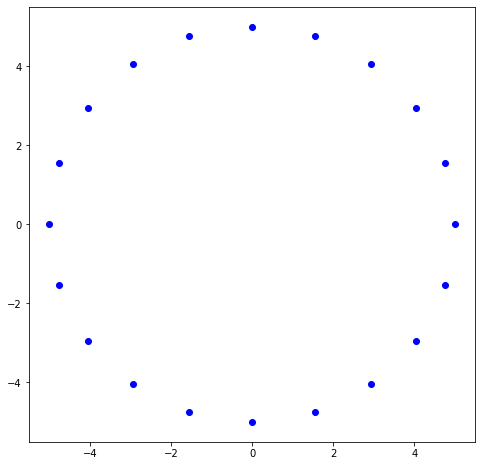

In [7]:
plt.figure(figsize = (8,8))
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.plot(x, y, 'bo')
plt.show()

In [8]:
#initial displacement of the masses 
ui = np.zeros(N)
ui[0] = r/5

ttotal = 20 #total time of evolution
u, C = get_u_t(ui, omegas, a, ttotal)

In [9]:
x = (r+ui)*np.cos(theta)
y = (r+ui)*np.sin(theta)

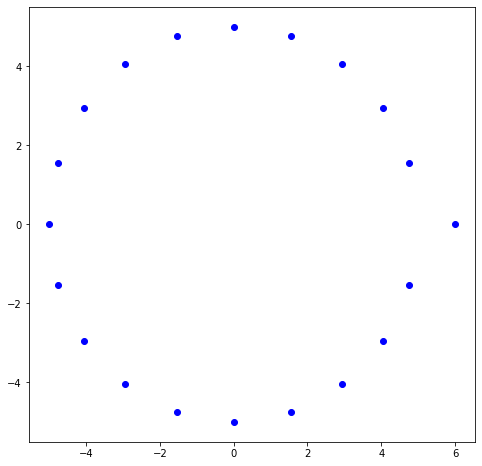

In [10]:
plt.figure(figsize = (8,8))
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.plot(x, y, 'bo')
plt.show()

In [12]:
def animate_matplotlib(filename, u, skip=10):

    #copy column 1 to last column if a new array
    u_comp = np.zeros((len(u[:,0]), N+2))
    u_comp[:,:-1] = u[:,:]
    u_comp[:,-1] = u[:,1]
    theta_comp = np.zeros(N+1)
    theta_comp[:-1] = theta[:]
    theta_comp[-1] = theta[0]

    Niterations = len(u[:,0])

    with animation(filename, fps=30) as anim:
        t_offsets = np.arange(Niterations)
        i=0
        for offset in tqdm(t_offsets):

            if i>=0 and i % (skip-1) == 0:
                fig = plt.figure(figsize=(12, 12), dpi=72)
                # plot
                plt.title("displacement of each atom")
                plt.xlabel("x (m)")
                plt.ylabel("$u(t_total)$ (m)")
                x = (r+u_comp[i,1:])*np.cos(theta_comp)
                y = (r+u_comp[i,1:])*np.sin(theta_comp)
                plt.plot(x, y,'bo-')
                plt.xlim(-L/2,L/2)
                plt.grid()
                anim.add_frame(fig)
                plt.close(fig)
            i=i+1

In [13]:
#create animation
filename = 'circle.mp4'
animate_matplotlib(filename, u, 20)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:49<00:00, 18.31it/s]
